In [1]:
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model, Input
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import Bidirectional
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers import Reshape
from keras.layers import Average
from keras_contrib.layers import CRF
import keras
from sklearn.model_selection import train_test_split
# define documents
import numpy as np
import pandas as pd
import os
from tqdm.auto import tqdm
tqdm.pandas()
import pickle
# import matplotlib.pyplot as plt

Using TensorFlow backend.


In [319]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
def PCA_with_SVM(X_train,Y_train):
    estimators = [('reduce_dim', PCA()), ('clf', SVC() )]
    pipe = Pipeline(estimators)
    pipe.fit(X_train,Y_train)
    return(pipe)
def svm_wrapper(X_train,Y_train):
    param_grid = [
    {'C': [1, 10], 'kernel': ['linear']},
    {'C': [1, 10], 'gamma': [0.1,0.01], 'kernel': ['rbf']},]
    svm = GridSearchCV(SVC(),param_grid)
    svm.fit(X_train, Y_train)
    return(svm)
from sklearn.ensemble import RandomForestClassifier
def radom_forest_wrapper(X_train,Y_train):
    param_grid = [
    { 'max_depth' : [i for i in np.arange(1,10)], 
       'n_estimators': [j for j in np.arange(1,10)]}]
    rand = GridSearchCV(RandomForestClassifier(),param_grid)
    rand.fit(X_train,Y_train)
    return(rand)
from sklearn.naive_bayes import BernoulliNB
def naive_bayes(X_train,Y_train):
    clf = BernoulliNB()
    clf.fit(X_train, Y_train)
    return(clf)
from sklearn.neural_network import MLPClassifier
def mlp_wrapper(X_train,Y_train):
    param_grid = [{'hidden_layer_sizes':np.arange(10,100,4),'max_iter':[30] ,'activation':['logistic', 'tanh','relu']}]
    mlp = GridSearchCV(MLPClassifier(), param_grid)
    mlp.fit(X_train, Y_train)
    return(mlp)
def boosting(X_train,Y_train):
    gb= GradientBoostingClassifier()
    gb.fit(X_train, Y_train)
    return(gb)

In [2]:
## tokenize the text..
from keras.preprocessing.text import Tokenizer
from keras.layers import Embedding
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
def get_tokens(sentence):
#     tokens = nltk.word_tokenize(sentence)  # now using tweet tokenizer
    tokens = tknzr.tokenize(sentence)
    tokens = [token for token in tokens if (token not in stopwords and len(token) > 1)]
    tokens = [get_lemma(token) for token in tokens]
    return (tokens)

In [3]:
from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma

In [4]:
from sklearn.utils import shuffle
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K

In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [6]:
# setup env
import nltk
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/samarthgoal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/samarthgoal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
dir_path = "/home/samarthgoal/language_vision/input/reddit/"

In [386]:
embedding_path = "/home/samarthgoal/embeddings/glove.twitter.27B.100d.txt" ## change
embedding_ff = "/home/samarthgoal/embeddings/fasttext_100.vec"

In [9]:
top_dir = "/home/samarthgoal/language_vision"
model_dir = os.path.join(top_dir,"models")

In [10]:
df_rage = pd.read_csv(os.path.join(dir_path,'processed_rage.csv'))
df_happy =  pd.read_csv(os.path.join(dir_path,'processed_happy.csv'))
df_gore =  pd.read_csv(os.path.join(dir_path,'processed_gore.csv'))
df_creepy =  pd.read_csv(os.path.join(dir_path,'processed_creepy.csv'))

In [11]:
# create a random balances dataset of all of the categories
length = np.min([len(df_rage),len(df_happy),len(df_creepy),len(df_gore)])

In [12]:
## combing all of the dataset
df_final = pd.concat([df_rage[:length], df_happy[:length], df_gore[:length], df_creepy[:length]], ignore_index=True)

## loading the filtered dataset

In [77]:
## load the filtered df_
df_input = pd.read_csv(os.path.join(top_dir,"input","input_data.csv"))
length = np.min(list(df_input.subreddit.value_counts()))
## creating a balanced dataset
df_happy =(df_input.loc[df_input.subreddit == "happy"])
df_gore = (df_input.loc[df_input.subreddit == "gore"])
df_rage = (df_input.loc[df_input.subreddit == "rage"])
df_creepy = (df_input.loc[df_input.subreddit == "creepy"])
df_input = pd.concat([ df_happy[:length], df_rage[:length], df_gore[:length], df_creepy[:length]], ignore_index=True)

In [176]:
# create a random balances dataset of all of the categories
Y_new = df_input['subreddit']

In [177]:
# encode the output
y = le.fit_transform(Y_new) 

In [178]:
print(len(Y_new))
print(len(df_input))
print(len(img_data_input))
print(len(lng_data))

1536
1536
1536
1536


In [234]:
train_data, test_data, Y_train, Y_test = train_test_split(df_input,y,test_size=0.20,random_state=6)

### img_preprocessing

In [13]:
import urllib.request
import os
import pandas as pd
from io import BytesIO
import numpy as np
from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt
import pickle
from keras.layers import Lambda, Input
from keras.models import Model
from keras.backend import tf as ktf
import urllib.request
from requests.exceptions import ConnectionError
tqdm.pandas()

In [321]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input as preprocess_input_incept
from keras.layers import MaxPooling1D
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input as preprocess_input_res
from keras.layers import Maximum
from keras.layers import Concatenate
from keras.layers import Dense
from keras.layers import Flatten
import numpy as np
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
import urllib3
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [15]:
## trying with img1
# @ param: img url @ return feature vector 
from PIL import Image
import requests

In [268]:
def get_img_data(url,size):
    try : 
        response = requests.get(url)
        img_data = 0
        if (response.status_code == 200):
            try:
                if (url.endswith('.jpg') or url.endswith('.jpeg') or url.endswith('.png')):
                    with urllib.request.urlopen(url) as url1:
                        with open('temp.jpg', 'wb') as f:
                            f.write(url1.read())
                    fh = open('temp.jpg')
                    if fh:
                        img = image.load_img('temp.jpg', target_size=size) # 224*224
                        os.remove('temp.jpg')
                        img_data = image.img_to_array(img)
                    return img_data
            except RuntimeError as e:
                return 0  # except runtime error fro file that doesn't exits
        return img_data
    except IOError:
        return 0
    except FileNotFoundError as e:
        return 0
    except ConnectionError as e:
        return 0
    except urllib.error.HTTPError as e:
        return 0

In [190]:
## convert to 100-D
model = ResNet50(weights='imagenet', include_top=True)
model_res = Model(input=model.input, output=model.get_layer('fc1000').output)

/home/samarthgoal/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("fc...)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [192]:
input = model_res.output
# model = Dense(100,activation= 'relu')(input)
out = Dense(4, activation='softmax')(input)
model_img = Model(input= model_res.input, output=out)

/home/samarthgoal/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  after removing the cwd from sys.path.


In [199]:
for layer in model_res.layers:
    layer.trainable = False

In [200]:
model_img.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [274]:
## load the image data
def get_image_input(df,size):
    img_data = list()
    for index,row in tqdm(df.iterrows(),total=len(df)):
        temp = get_img_data(row['url'],size)
        img_data.append(temp)
    img_data = np.array(img_data)
    img_data = preprocess_input_res(np.array(list(img_data)))
    return img_data

In [277]:
img_data = get_image_input(train_data,(224,224))

In [279]:
img_data_test = get_image_input(test_data,(224,224))

In [280]:
(img_data).shape

(1228, 224, 224, 3)

In [281]:
print(img_data_test.shape)
print(Y_train.shape)

(308, 224, 224, 3)
(1228,)


In [201]:
model_img.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_19[0][0]                   
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [282]:
model_img.fit(img_data,Y_train,verbose=1,nb_epoch=15,validation_split=0.2)

Train on 982 samples, validate on 246 samples
Epoch 1/15


/home/samarthgoal/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


982/982 [==============================] - 136s 139ms/step - loss: 1.4995 - acc: 0.2749 - val_loss: 1.4594 - val_acc: 0.3130
Epoch 2/15
982/982 [==============================] - 137s 139ms/step - loss: 1.3027 - acc: 0.3941 - val_loss: 1.3196 - val_acc: 0.4187
Epoch 3/15
982/982 [==============================] - 137s 140ms/step - loss: 1.1542 - acc: 0.5234 - val_loss: 1.2358 - val_acc: 0.4472
Epoch 4/15
982/982 [==============================] - 137s 139ms/step - loss: 1.0684 - acc: 0.5580 - val_loss: 1.1824 - val_acc: 0.4837
Epoch 5/15
982/982 [==============================] - 137s 139ms/step - loss: 0.9848 - acc: 0.6405 - val_loss: 1.1501 - val_acc: 0.5203
Epoch 6/15
982/982 [==============================] - 138s 141ms/step - loss: 0.9385 - acc: 0.6507 - val_loss: 1.1357 - val_acc: 0.5244
Epoch 7/15
982/982 [==============================] - 137s 140ms/step - loss: 0.8672 - acc: 0.6914 - val_loss: 1.1169 - val_acc: 0.5325
Epoch 8/15
982/982 [==============================] - 139s 

In [283]:
from sklearn.metrics import classification_report,confusion_matrix
Y_pred = model_img.predict(img_data_test,verbose=1)
y_pred = np.array([np.argmax(pred) for pred in Y_pred])
print('  Classification Report:\n',classification_report(Y_test,y_pred),'\n')

308/308 [==============================] - 38s 125ms/step
  Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.59      0.58        80
           1       0.61      0.71      0.65        76
           2       0.59      0.44      0.50        77
           3       0.54      0.57      0.56        75

   micro avg       0.58      0.58      0.58       308
   macro avg       0.58      0.58      0.57       308
weighted avg       0.58      0.58      0.57       308
 



In [ ]:
## lets train the model independently an then combine the modalities

### text preprocessing

In [235]:
token_list = (df_input['title'].apply(get_tokens))

In [236]:
## join the filtered tokens back again to the keras tokenizer which would give vocalb words etc
from keras.preprocessing.text import Tokenizer
sentences = [' '.join(tokens) for tokens in token_list]
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(token_list)
vocab_size = len(t.word_index) + 1
vocab_size

3749

In [237]:
len(token_list)

1536

In [238]:
max_len = 0
for idx,tokens in enumerate(token_list):
    if len(tokens) > max_len:
        max_len = len(tokens)
        index = idx
print(max_len)

34


In [243]:
tokens = train_data['title'].apply(get_tokens)

In [244]:
len(tokens)

1228

In [245]:
senetences = [' '.join(tokens) for tokens in tokens]

In [246]:
vocab_size = vocab_size
# integer encode the documents
encoded_docs = t.texts_to_sequences(senetences)
# pad documents to a max length of 4 words
max_length = max_len
lng_data = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

In [258]:
def get_encoded_data(tokens,max_len):
    senetences = [' '.join(tokens) for tokens in tokens]
    # integer encode the documents
    encoded_docs = t.texts_to_sequences(senetences)
    # pad documents to a max length of 4 words
    lng_data = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
    return lng_data

### Embedding

In [247]:
# create the word2vec dict from the dictionary
def get_word2vec(file_path):
    file = open(embedding_path, "r")
    if (file):
        word2vec = dict()
        split = file.read().splitlines()
        for line in split:
            key = line.split(' ',1)[0] # the first word is the key
            value = np.array([float(val) for val in line.split(' ')[1:]])
            word2vec[key] = value
        return (word2vec)
    else:
        print("invalid fiel path")

In [387]:
## dont run it again!!
w2v_ff = get_word2vec(embedding_ff)

In [249]:
## load the pre-converted w2v file from models dir
w2v = pickle.load(open(os.path.join(model_dir,"w2v.pkl"),"rb"))

In [388]:
# get the embedding matrix from the embedding layer
from numpy import zeros
embedding_matrix_ff = zeros((vocab_size, 100))
for word, i in t.word_index.items():
	embedding_vector = w2v_ff.get(word)
	if embedding_vector is not None:
		embedding_matrix_ff[i] = embedding_vector

In [389]:
## text model
input1 = Input(shape=(max_len,))
model =  Embedding(vocab_size, 100, weights=[embedding_matrix_ff], input_length=max_length,trainable=False)(input1)
model =  Bidirectional( LSTM(units=100,return_sequences=True,dropout=0.25),merge_mode="concat")(model)
model = TimeDistributed( Dense(100, activation="relu"))(model)
model = Flatten()(model)
model = Dense(100, activation = 'relu')(model)
out = Dense(4, activation='softmax')(model)

In [390]:
lng_model_ff = Model(inputs=input1, outputs=out)

In [391]:
lng_model_ff.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [392]:
lng_model_ff.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        (None, 34)                0         
_________________________________________________________________
embedding_14 (Embedding)     (None, 34, 100)           374900    
_________________________________________________________________
bidirectional_14 (Bidirectio (None, 34, 200)           160800    
_________________________________________________________________
time_distributed_7 (TimeDist (None, 34, 100)           20100     
_________________________________________________________________
flatten_4 (Flatten)          (None, 3400)              0         
_________________________________________________________________
dense_41 (Dense)             (None, 100)               340100    
_________________________________________________________________
dense_42 (Dense)             (None, 4)                 404       
Total para

In [393]:
lng_data.shape

(1228, 34)

In [396]:
lng_model_ff.fit(lng_data,Y_train,verbose=1,validation_split=0.2,nb_epoch = 5)

Train on 982 samples, validate on 246 samples
Epoch 1/5
 96/982 [=>............................] - ETA: 1s - loss: 0.2239 - acc: 0.9271

/home/samarthgoal/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


982/982 [==============================] - 1s 1ms/step - loss: 0.2561 - acc: 0.9145 - val_loss: 0.8245 - val_acc: 0.7276
Epoch 2/5
982/982 [==============================] - 1s 1ms/step - loss: 0.2120 - acc: 0.9338 - val_loss: 0.9516 - val_acc: 0.7276
Epoch 3/5
982/982 [==============================] - 1s 1ms/step - loss: 0.1735 - acc: 0.9358 - val_loss: 0.9572 - val_acc: 0.7154
Epoch 4/5
982/982 [==============================] - 1s 1ms/step - loss: 0.1847 - acc: 0.9358 - val_loss: 1.0165 - val_acc: 0.7195
Epoch 5/5
982/982 [==============================] - 1s 1ms/step - loss: 0.1830 - acc: 0.9318 - val_loss: 1.0427 - val_acc: 0.6870


In [399]:
lng_model_ff.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        (None, 34)                0         
_________________________________________________________________
embedding_14 (Embedding)     (None, 34, 100)           374900    
_________________________________________________________________
bidirectional_14 (Bidirectio (None, 34, 200)           160800    
_________________________________________________________________
time_distributed_7 (TimeDist (None, 34, 100)           20100     
_________________________________________________________________
flatten_4 (Flatten)          (None, 3400)              0         
_________________________________________________________________
dense_41 (Dense)             (None, 100)               340100    
_________________________________________________________________
dense_42 (Dense)             (None, 4)                 404       
Total para

In [259]:
tokens = test_data['title'].apply(get_tokens)
lng_data_test = get_encoded_data(tokens,max_len)

In [260]:
from sklearn.metrics import classification_report,confusion_matrix
Y_pred = lng_model_ff.predict(lng_data_test,verbose=1)
y_pred = np.array([np.argmax(pred) for pred in Y_pred])
print('  Classification Report:\n',classification_report(Y_test,y_pred),'\n')

308/308 [==============================] - 9s 29ms/step
  Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.69      0.68        80
           1       0.64      0.76      0.70        76
           2       0.84      0.82      0.83        77
           3       0.70      0.57      0.63        75

   micro avg       0.71      0.71      0.71       308
   macro avg       0.72      0.71      0.71       308
weighted avg       0.71      0.71      0.71       308
 



In [397]:
from sklearn.metrics import classification_report,confusion_matrix
Y_pred = lng_model_ff.predict(lng_data_test,verbose=1)
y_pred = np.array([np.argmax(pred) for pred in Y_pred])
print('  Classification Report:\n',classification_report(Y_test,y_pred),'\n')

308/308 [==============================] - 0s 479us/step
  Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.64      0.67        80
           1       0.68      0.71      0.70        76
           2       0.90      0.71      0.80        77
           3       0.60      0.77      0.68        75

   micro avg       0.71      0.71      0.71       308
   macro avg       0.72      0.71      0.71       308
weighted avg       0.73      0.71      0.71       308
 



### final model

In [132]:
img_data_input.shape

(1536, 1000)

In [225]:
len(y)

1536

In [231]:
len(df_input)

1536

In [400]:
## lets fuse..
model_1 = Model(input=model_img.input, output=model_img.get_layer('dense_30').output)
model_2 = Model(input=lng_model.input, output=lng_model.get_layer('dense_38').output)
model_1b = Model(input=lng_model_ff.input, output=lng_model_ff.get_layer('dense_41').output)

/home/samarthgoal/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  
/home/samarthgoal/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/samarthgoal/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  after removing the cwd from sys.path.


In [326]:
part1_train = model_1.predict(img_data,verbose=1)
part2_train = model_2.predict(lng_data, verbose=1)

1228/1228 [==============================] - 1s 461us/step


In [403]:
part2b_train = model_1b.predict(lng_data,verbose=1)

1228/1228 [==============================] - 1s 634us/step


In [447]:
part2u_train = np.maximum(part2_train,part2b_train)

In [448]:
# X_train = np.hstack(part1,part2)
X_train = np.hstack((part1_train,part2u_train))

In [409]:
part1 = model_1.predict(img_data_test,verbose=1)
part2 = model_2.predict(lng_data_test, verbose=1)

308/308 [==============================] - 9s 29ms/step


In [412]:
part2b = model_1b.predict(lng_data_test,verbose=1)

308/308 [==============================] - 0s 726us/step


In [449]:
part2u = np.maximum(part2,part2b)

In [450]:
X_test = np.hstack((part1,part2u))

In [451]:
X_test.shape

(308, 200)

In [452]:
X_train.shape

(1228, 200)

In [453]:
## getting the scores with late fusion
# svm
svm = svm_wrapper(X_train,Y_train)
Y_pred = svm.predict(X_test)
score = accuracy_score(Y_test,Y_pred)
print("accuarcy :", score)
confusion_matrix(Y_test,Y_pred)
print('  Classification Report:\n',classification_report(Y_test,Y_pred),'\n')

/home/samarthgoal/.local/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


accuarcy : 0.775974025974026
  Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.69      0.73        80
           1       0.75      0.86      0.80        76
           2       0.88      0.82      0.85        77
           3       0.72      0.75      0.73        75

   micro avg       0.78      0.78      0.78       308
   macro avg       0.78      0.78      0.78       308
weighted avg       0.78      0.78      0.78       308
 



In [383]:
Scores.append(0.78)
label.append("fusion")

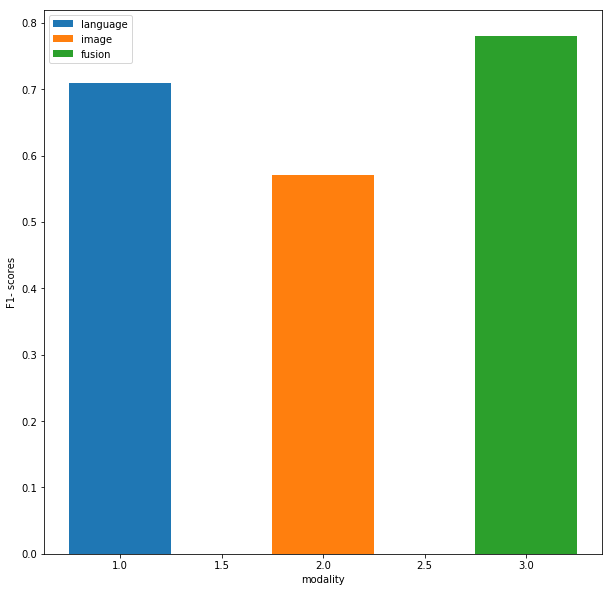

In [385]:
plt.figure(figsize=(10,10))
for idx,score in enumerate(Scores):
    plt.bar((1+idx),score,label = label[idx],width=0.5)
plt.xlabel("modality")
plt.ylabel("F1- scores")
plt.legend()
plt.show()

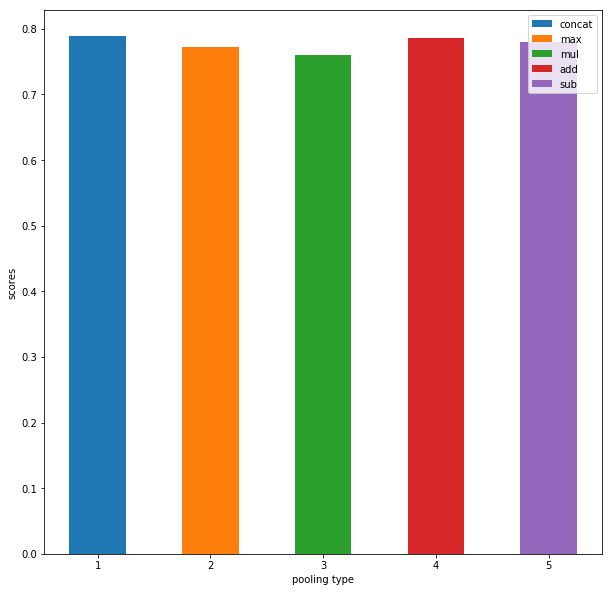

In [378]:
plt.figure(figsize=(10,10))
for idx,score in enumerate(Scores):
    plt.bar((1+idx),score,label = label[idx],width=0.5)
plt.xlabel("pooling type")
plt.ylabel("scores")
plt.legend()
plt.show()

## prediction

In [164]:
X_test = [lng_data_test,img_data_test]

In [168]:
len(lng_data_test)

308

In [169]:
len(Y_test)

308

In [170]:
from sklearn.metrics import classification_report,confusion_matrix
Y_pred = model.predict(X_test,verbose=1)
y_pred = np.array([np.argmax(pred) for pred in Y_pred])
print('  Classification Report:\n',classification_report(Y_test,y_pred),'\n')

308/308 [==============================] - 0s 376us/step
  Classification Report:
               precision    recall  f1-score   support

           0       0.26      0.28      0.27        80
           1       0.23      0.20      0.21        76
           2       0.24      0.22      0.23        77
           3       0.21      0.25      0.23        75

   micro avg       0.24      0.24      0.24       308
   macro avg       0.24      0.24      0.24       308
weighted avg       0.24      0.24      0.24       308
 



## dump the w2v vec file

In [ ]:
import pickle
with open(os.path.join(model_dir,"w2v.pkl"),"wb") as f:
    pickle.dump(w2v,f)

In [ ]:
## dump the image array
with open(os.path.join(model_dir,"img_data.pkl"),"wb") as f:
    pickle.dump(img_data,f)

In [292]:
## dump the model
# serialize model to JSON
def dump_model(model,path):
    model_json = model.to_json()
    with open(path, "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights(os.path.join(model_dir,"model.h5"))
    print("Saved model to disk")

In [293]:
path = os.path.join(model_dir,"img_model.json")
dump_model(model_img,path)

Saved model to disk


In [294]:
path = os.path.join(model_dir,"lng_model.json")
dump_model(lng_model,path)

Saved model to disk
